In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
from scipy.io import loadmat
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
WA = r"$\textrm{W}_1(\hat{\textbf{p}}_{\mathcal{H}(\mathcal{T})}, \textbf{p}^\star_{\mathcal{H}(\mathcal{T})})$"
TV = r"$\textrm{TV}(\hat{\textbf{p}}_{\mathcal{H}(\mathcal{T})}, \textbf{p}^\star_{\mathcal{H}(\mathcal{T})})$"
label_size = 22 + 4
tick_size = 20 + 4
title_size = 24 + 4
legend_size = 22 + 4

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

In [2]:
df_n_h = pd.read_parquet("varying_n_h.parquet")
df_n_p = pd.read_parquet("varying_n_p.parquet")

label_mapping = {"noiseless": "Noiseless", 
                 "bernoulli01": r"Bern($0.01$)", 
                 "bernoulli02": r"Bern($0.02$)", 
                 "bernoulli05": r"Bern($0.05$)", 
                 "sigmoid500": r"Sigmoid($c=500$)", 
                 "sigmoid300": r"Sigmoid($c=300$)"}

df_n_p = df_n_p.sort_values(by="noise", key=lambda x: list(map(lambda y: {"noiseless": 0, "bernoulli01": 1, "bernoulli02": 2, "bernoulli05": 3,"sigmoid300": 4, "sigmoid500": 5}[y], x)))
df_n_h = df_n_h.sort_values(by="noise", key=lambda x: list(map(lambda y: {"noiseless": 0, "bernoulli01": 1, "bernoulli02": 2, "bernoulli05": 3,"sigmoid300": 4, "sigmoid500": 5}[y], x)))

/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_4192/1494167799.py:29: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[1].set_ylim(0, 0.1)
/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_4192/1494167799.py:59: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[3].set_ylim(0, 0.1)
/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_4192/1494167799.py:76: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_4192/1494167799.py:29: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[1].set_ylim(0, 0.1)
/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_4192/1494167799.py:59: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[3].set_ylim(0, 0

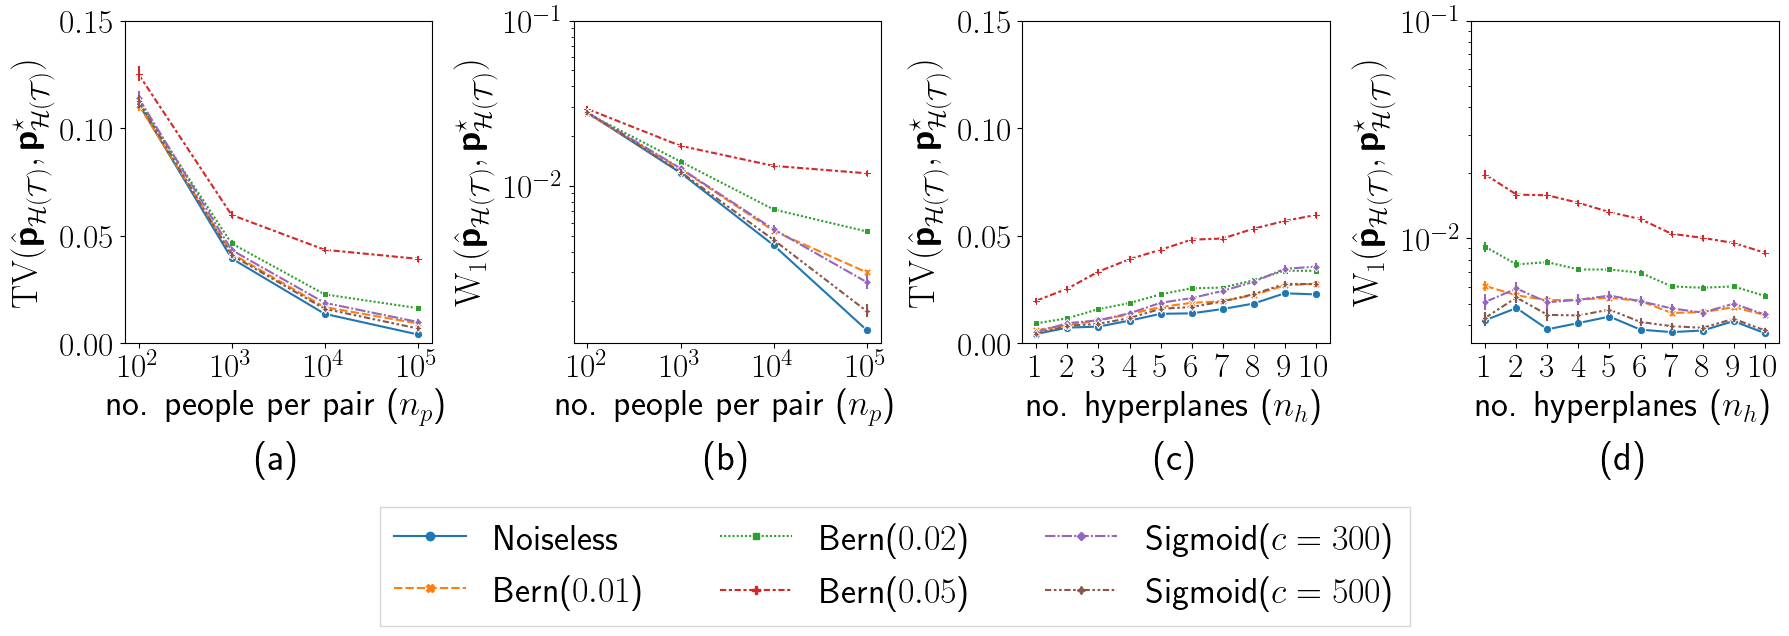

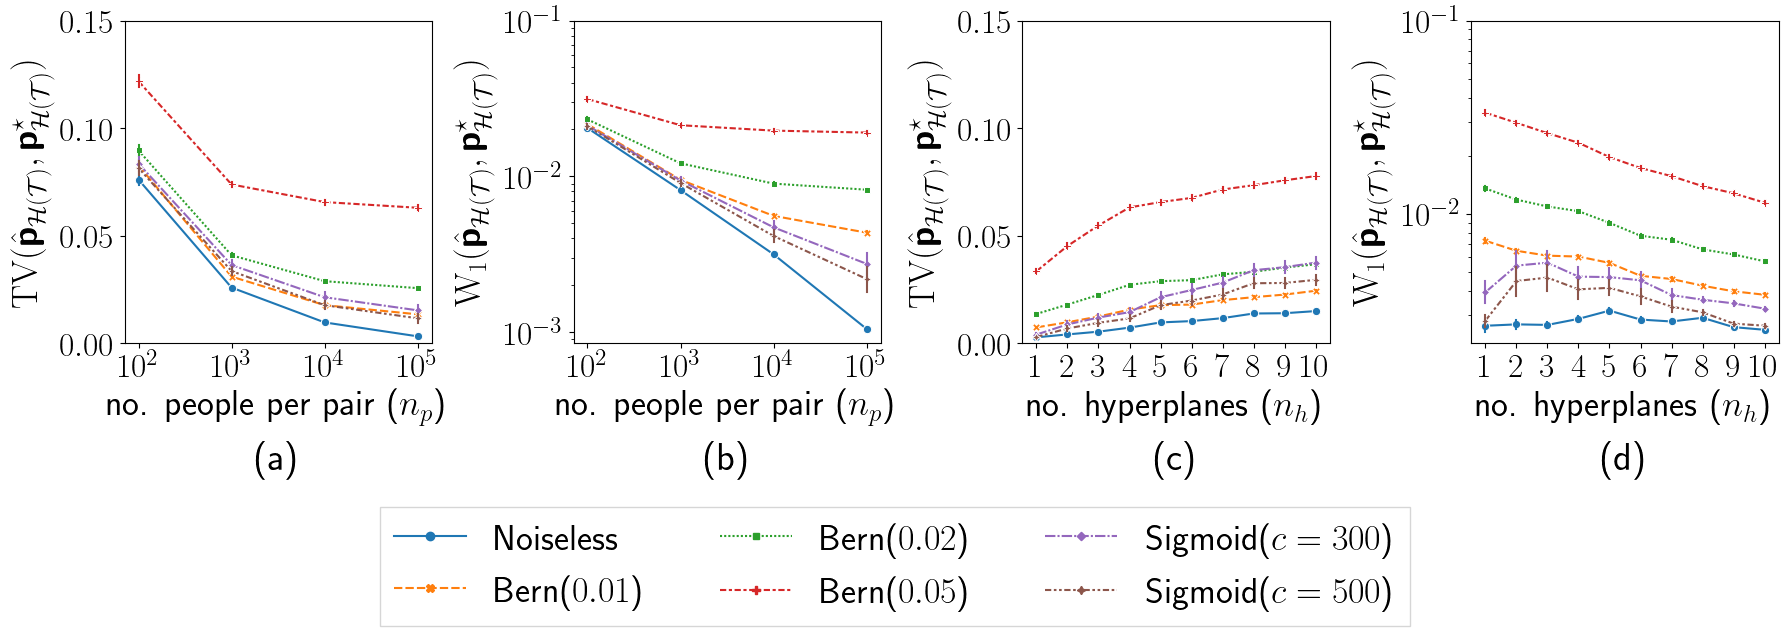

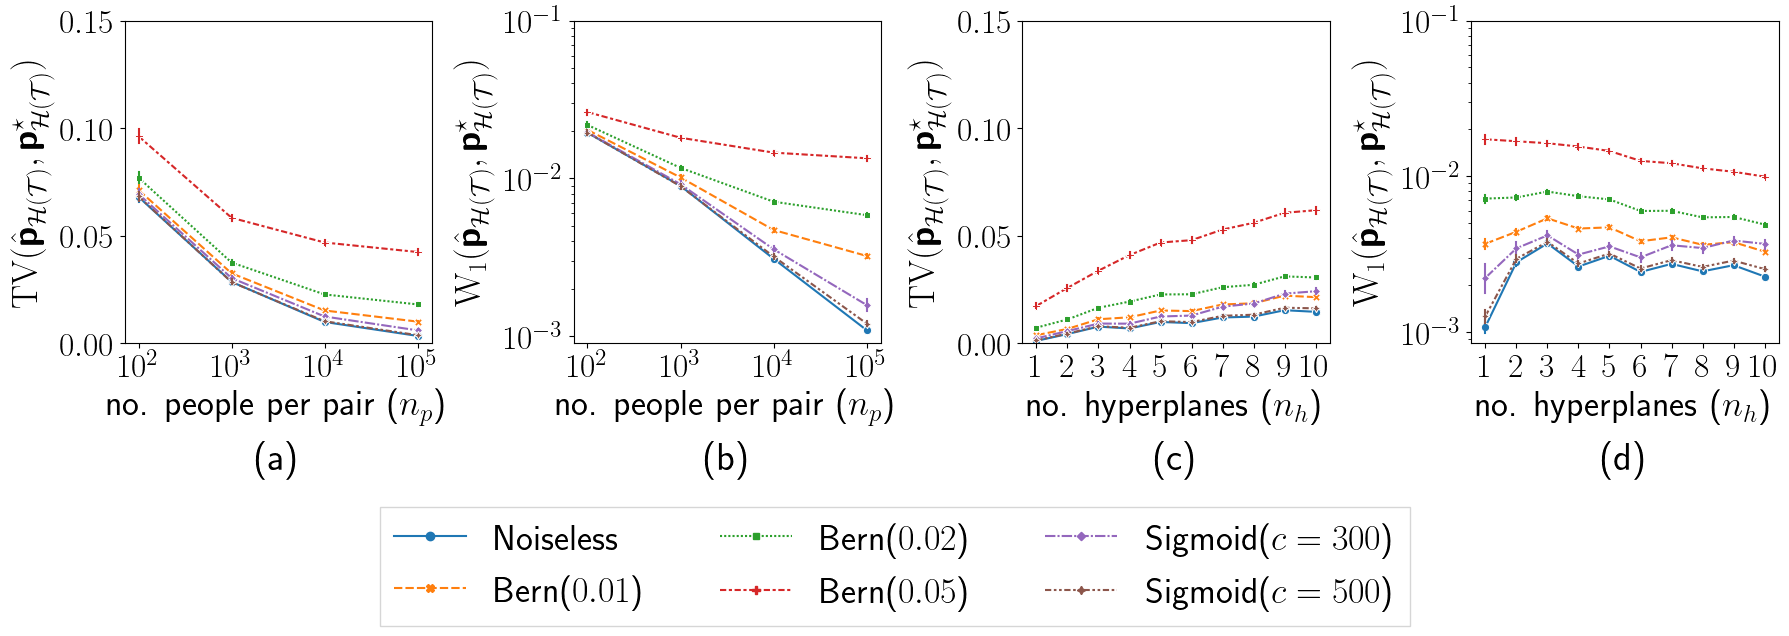

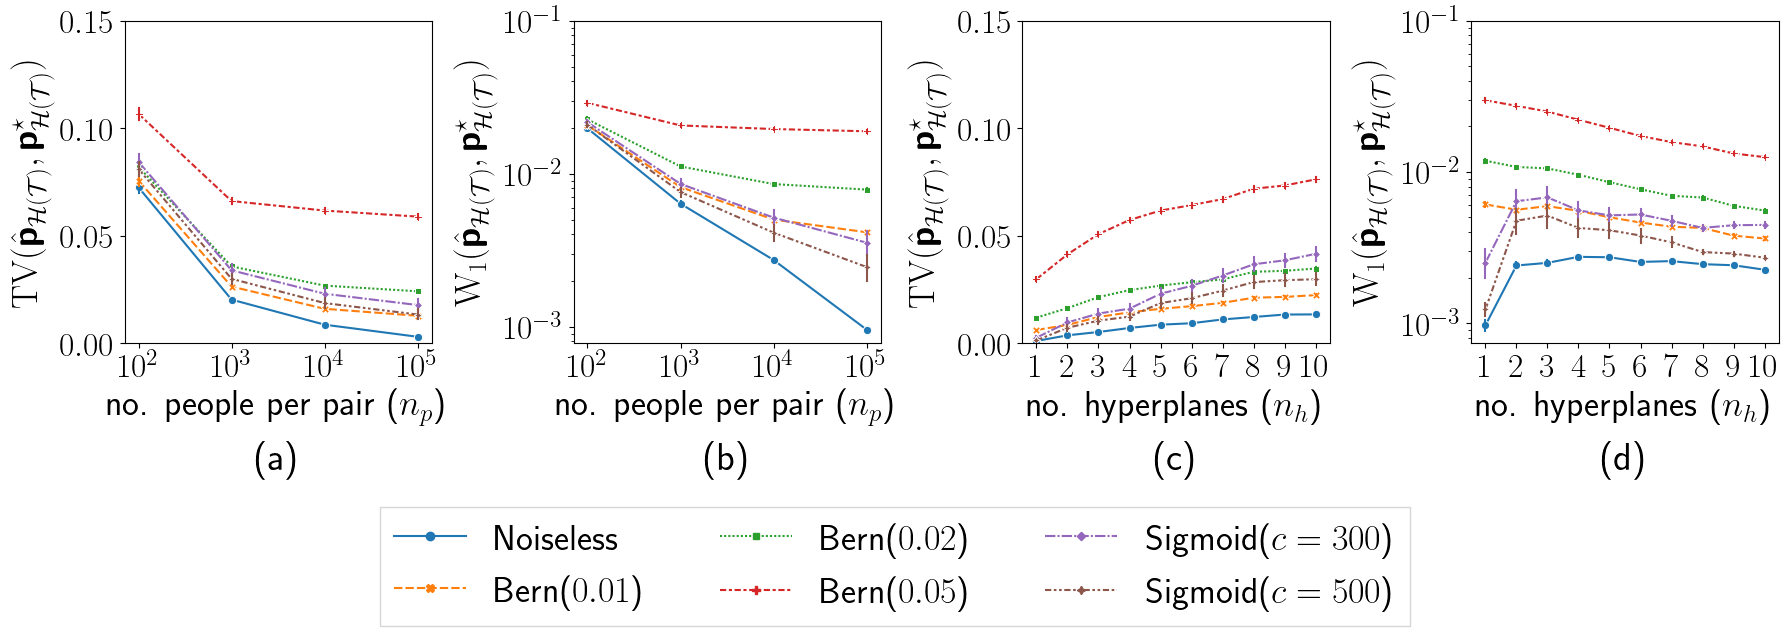

In [3]:
for user_dist in ["uniform", "gaussian", "mix2gaussian", "mix3gaussian"]:
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(18, 5))

    sns.lineplot(data=df_n_p[(df_n_p.user_dist == user_dist) 
                             & (df_n_p.variable == "total_variation_q_hat")],
                 x="n_p",
                 y="err",
                 err_style="bars",
                 markers=True,
                 hue="noise",
                 style="noise",
                 ax=axs[0])
    axs[0].set_ylim(0, 0.15)
    axs[0].set_xscale("log")
    axs[0].set_xticks([100, 1000, 10000, 100000])
    axs[0].set_ylabel(TV, fontsize=label_size)
    axs[0].set_xlabel(r"no. people per pair ($n_p$)", fontsize=label_size)

    sns.lineplot(data=df_n_p[(df_n_p.user_dist == user_dist) 
                             & (df_n_p.variable == "wasserstein_q_hat")],
                 x="n_p",
                 y="err",
                 err_style="bars",
                 markers=True,
                 hue="noise",
                 style="noise",
                 ax=axs[1])
    axs[1].set_yscale("log")
    axs[1].set_ylim(0, 0.1)
    axs[1].set_xscale("log")
    axs[1].set_xticks([100, 1000, 10000, 100000])
    axs[1].set_ylabel(WA, fontsize=label_size)
    axs[1].set_xlabel(r"no. people per pair ($n_p$)", fontsize=label_size)

    sns.lineplot(data=df_n_h[(df_n_h.user_dist == user_dist) 
                             & (df_n_h.variable == "total_variation_q_hat")],
                 x="n_h",
                 y="err",
                 err_style="bars",
                 markers=True,
                 hue="noise",
                 style="noise",
                 ax=axs[2])
    axs[2].set_ylim(0, 0.15)
    axs[2].set_xticks(list(range(1, 11)))
    axs[2].set_ylabel(TV, fontsize=label_size)
    axs[2].set_xlabel(r"no. hyperplanes ($n_h$)", fontsize=label_size)

    sns.lineplot(data=df_n_h[(df_n_h.user_dist == user_dist) 
                             & (df_n_h.variable == "wasserstein_q_hat")],
                 x="n_h",
                 y="err",
                 err_style="bars",
                 markers=True,
                 hue="noise",
                 style="noise",
                 ax=axs[3])
    axs[3].set_yscale("log")
    axs[3].set_ylim(0, 0.1)
    axs[3].set_xticks(list(range(1, 11)))
    axs[3].set_ylabel(WA, fontsize=label_size)
    axs[3].set_xlabel(r"no. hyperplanes ($n_h$)", fontsize=label_size)


    handles, labels = axs[0].get_legend_handles_labels()
    new_labels = list(map(lambda x: label_mapping[x], labels))

    for i, ax in enumerate(axs):
        ax.get_legend().remove()
        ax.tick_params(axis='both', which='major', labelsize=tick_size)
        ax.set_title("(" + f"{chr(97 + i)}" + ")", loc="center", y=0, fontsize=title_size, pad=-70, verticalalignment="top")

    fig.legend(handles, new_labels, loc="outside lower center", bbox_to_anchor=(0.5, -0.3), fancybox=False, shadow=False, ncol=3, fontsize=legend_size)
    fig.tight_layout()
    fig.savefig(f"fig/1d_figure1_{user_dist}.pdf", dpi=300, format="pdf", bbox_inches="tight")
    fig.show()